In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
import joblib

def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

def preprocess_data(data):
    label_encoder = LabelEncoder()
    data['label'] = label_encoder.fit_transform(data['label'])

    data = pd.get_dummies(data, columns=['src', 'dst', 'Protocol'])

    #print(combined_data.isnull().sum())
    data = data.dropna()

    X = data.drop('label', axis=1)
    y = data['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X,y,X_train, X_test, y_train, y_test

def train_model_and_evaluate(X_train, y_train,method,X_test, y_test):
    methods = {
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
        'LogisticRegression': LogisticRegression(),
        'KMeans': KMeans(n_clusters=2,n_init=10),  # Specify the number of clusters as needed
        'DecisionTree': DecisionTreeClassifier(),
    }
    model = methods[method]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def save_model(model, model_filename='ddos_model.pkl'):
    joblib.dump(model, model_filename)
    print(f"Model saved as {model_filename}")

def load_model(model_filename='ddos_compare_model.pkl'):
    loaded_model = joblib.load(model_filename)
    return loaded_model

def predict_instance(model, input_instance):
    methods = {
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
        'LogisticRegression': LogisticRegression(),
        'KMeans': KMeans(n_clusters=2,n_init=10),  # Specify the number of clusters as needed
        'DecisionTree': DecisionTreeClassifier(),
    }

    predictions_table = {}
    for method, method_model in methods.items():
        method_model.fit(X_train, y_train)
        prediction = method_model.predict(input_instance)
        predictions_table[method] = prediction[0]

    # Print the predictions table
    print("Predictions for the given instance:")
    print(pd.DataFrame(predictions_table.items(), columns=['Method', 'Predicted Class']))

# Load and preprocess data
data = load_data("/content/dataset_sdn.csv")
X,y,X_train,X_test,y_train,y_test = preprocess_data(data)
ddos_model=[]
accuracy={}
methods_to_train = ['RandomForest', 'LogisticRegression','KMeans','DecisionTree']
for method in methods_to_train:
    accuracy[method] = train_model_and_evaluate(X_train, y_train, method,X_test, y_test)

print(accuracy)




{'RandomForest': 1.0, 'LogisticRegression': 0.6050654853620955, 'KMeans': 0.5091872110939908, 'DecisionTree': 0.9997303543913714}


In [24]:
import numpy as np
import matplotlib.pyplot as plt
def evaluate_accuracy(X, y, model, color):
    train_sizes = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    accuracies = []
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_size, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    plt.plot(train_sizes, accuracies, label=model.__class__.__name__, color=color)
    plt.xlabel('Train-Test Size')
    plt.ylabel('Accuracy')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

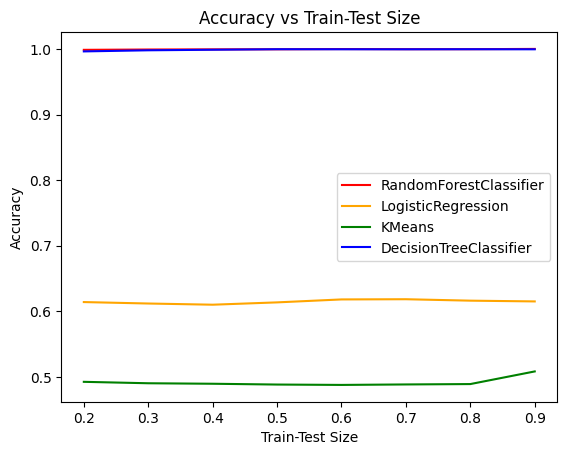

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression()
kmeans_model = KMeans(n_clusters=2,n_init=10)  # Specify the number of clusters as needed
dt_model = DecisionTreeClassifier()

evaluate_accuracy(X_train, y_train, rf_model, 'red')
evaluate_accuracy(X_train, y_train, lr_model, 'orange')
evaluate_accuracy(X_train, y_train, kmeans_model, 'green')
evaluate_accuracy(X_train, y_train, dt_model, 'blue')

plt.title('Accuracy vs Train-Test Size')
plt.legend()
plt.show()

Hence, we will proceed with Random Forest Classifier